<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB02_Pr1_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

In [12]:
# Importación de librerías a utilizar
import mlxtend as ml
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Lectura de la base de datos
filename = 'BlackFriday.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data.head(10)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [14]:
# Rellenamos los valores na con 0, ya que no tiene categoría
data = data.fillna(0)

# Quitamos los duplicados
data = data.drop_duplicates()

In [15]:
df_Product = data.groupby(['User_ID','Product_ID'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [16]:
df_Gender = data.groupby(['User_ID','Gender'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [17]:
df_Age = data.groupby(['User_ID','Age'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [18]:
df_Occupation = data.groupby(['User_ID','Occupation'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Occupation = df_Occupation.set_axis(['0_O','1_O','2_O','3_O','4_O','5_O','6_O','7_O','8_O','9_O','10_O','11_O','12_O','13_O','14_O','15_O','16_O','17_O','18_O','19_O','20_O'], axis = 1, inplace = False)

In [19]:
df_City = data.groupby(['User_ID','City_Category'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')

In [20]:
df_Stay = data.groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Stay = df_Stay.set_axis(['0_S','1_S','2_S','3_S','4+_S'], axis = 1, inplace = False)

In [21]:
df_Marital = data.groupby(['User_ID','Marital_Status'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Marital = df_Marital.set_axis(['0_M','1_M'], axis = 1, inplace = False)

In [22]:
df_Product_Category_1 = data.groupby(['User_ID','Product_Category_1'])['Product_Category_2'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_1 = df_Product_Category_1.set_axis(['1_C1','2_C1','3_C1','4_C1','5_C1','6_C1','7_C1','8_C1','9_C1','10_C1','11_C1','12_C1','13_C1','14_C1','15_C1','16_C1','17_C1','18_C1'], axis = 1, inplace = False)

In [23]:
df_Product_Category_2 = data.groupby(['User_ID','Product_Category_2'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_2 = df_Product_Category_2.set_axis(['0_C2','2_C2','3_C2','4_C2','5_C2','6_C2','7_C2','8_C2','9_C2','10_C2','11_C2','12_C2','13_C2','14_C2','15_C2','16_C2','17_C2','18_C2'], axis = 1, inplace = False)

In [24]:
df_Product_Category_3 = data.groupby(['User_ID','Product_Category_3'])['Product_Category_1'].sum().apply(lambda x: x>0).unstack().fillna(False).reset_index().set_index('User_ID')
df_Product_Category_3 = df_Product_Category_3.set_axis(['0_C3','3_C3','4_C3','5_C3','6_C3','8_C3','9_C3','10_C3','11_C3','12_C3','13_C3','14_C3','15_C3','16_C3','17_C3','18_C3'], axis = 1, inplace = False)

In [25]:
df = pd.concat([df_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)

In [26]:
frq_items = apriori(df, min_support = 0.5, use_colnames = True)

# Eliminamos las reglas que no sirven
mask = (frq_items['itemsets'].apply(lambda x: '0_C2' in x) | frq_items['itemsets'].apply(lambda x: '0_C3' in x))
frq_items = frq_items.drop(frq_items[mask].index)

In [27]:
# K = 1
print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == 1])

     support itemsets
0   0.532847      (C)
1   0.580037    (0_M)
2   0.905958   (1_C1)
3   0.536581   (2_C1)
4   0.852996   (5_C1)
5   0.521643   (6_C1)
6   0.767951   (8_C1)
8   0.729588   (2_C2)
9   0.527075   (4_C2)
10  0.592938   (5_C2)
11  0.516890   (6_C2)
12  0.830929   (8_C2)
13  0.757936  (14_C2)
14  0.656765  (15_C2)
15  0.723986  (16_C2)
17  0.533865   (5_C3)
18  0.538618  (14_C3)
19  0.565099  (15_C3)
20  0.670175  (16_C3)
21  0.556782  (17_C3)
22  0.717196      (M)


In [28]:
#K >= 2
i = 2
while i <= max(frq_items['itemsets'].apply(lambda x: len(x))):
  print(frq_items[frq_items['itemsets'].apply(lambda x: len(x)) == i])
  i = i + 1

      support        itemsets
24   0.527245     (0_M, 1_C1)
27   0.516551    (2_C1, 1_C1)
28   0.781531    (1_C1, 5_C1)
29   0.711254    (8_C1, 1_C1)
31   0.729588    (1_C1, 2_C2)
..        ...             ...
118  0.544559  (16_C3, 15_C2)
119  0.505177      (M, 15_C2)
121  0.553217  (16_C2, 16_C3)
122  0.539127      (16_C2, M)
129  0.503650      (M, 16_C3)

[65 rows x 2 columns]
      support              itemsets
134  0.647938    (8_C1, 1_C1, 5_C1)
136  0.644543    (1_C1, 2_C2, 5_C1)
137  0.526057    (5_C2, 1_C1, 5_C1)
138  0.705653    (5_C1, 1_C1, 8_C2)
139  0.657274   (1_C1, 14_C2, 5_C1)
..        ...                   ...
309  0.524868   (16_C2, 2_C2, 8_C2)
311  0.518418   (16_C3, 2_C2, 8_C2)
320  0.538109  (16_C2, 14_C2, 8_C2)
322  0.518927  (16_C3, 14_C2, 8_C2)
325  0.511119  (16_C2, 16_C3, 8_C2)

[74 rows x 2 columns]
      support                    itemsets
343  0.548973    (8_C1, 1_C1, 2_C2, 5_C1)
344  0.601935    (8_C1, 5_C1, 1_C1, 8_C2)
345  0.578849   (8_C1, 1_C1, 14_C2, 

In [29]:
# Reglas de asociación independientemente de la confianza
rules = association_rules(frq_items, metric = 'confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
1,(1_C1),(0_M),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
2,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
3,(1_C1),(2_C1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
4,(1_C1),(5_C1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
...,...,...,...,...,...,...,...,...,...
1265,(16_C2),"(5_C1, 1_C1, 14_C2, 8_C2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001
1266,(8_C2),"(16_C2, 1_C1, 14_C2, 5_C1)",0.830929,0.533186,0.503819,0.606333,1.137188,0.060780,1.185809
1267,(1_C1),"(5_C1, 16_C2, 14_C2, 8_C2)",0.905958,0.516551,0.503819,0.556118,1.076598,0.035846,1.089138
1268,(14_C2),"(5_C1, 16_C2, 1_C1, 8_C2)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567


In [30]:
# Reglas de asociación de alta confianza (confianza >= 0.9)
rules_AltaConf = association_rules(frq_items, metric ="confidence", min_threshold = 0.9)
rules_AltaConf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
1,(2_C1),(1_C1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
2,(5_C1),(1_C1),0.852996,0.905958,0.781531,0.916219,1.011326,0.008752,1.122470
3,(8_C1),(1_C1),0.767951,0.905958,0.711254,0.926172,1.022312,0.015523,1.273787
4,(2_C2),(1_C1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
...,...,...,...,...,...,...,...,...,...
251,"(16_C2, 1_C1, 14_C2, 8_C2)",(5_C1),0.525378,0.852996,0.503819,0.958966,1.124233,0.055674,3.582497
252,"(5_C1, 16_C2, 14_C2, 8_C2)",(1_C1),0.516551,0.905958,0.503819,0.975353,1.076598,0.035846,3.815588
253,"(16_C2, 1_C1, 14_C2, 5_C1)",(8_C2),0.533186,0.830929,0.503819,0.944922,1.137188,0.060780,3.069673
254,"(16_C2, 14_C2, 8_C2)","(1_C1, 5_C1)",0.538109,0.781531,0.503819,0.936278,1.198004,0.083270,3.428447


In [31]:
# Dado un antecesor, devolver todas las reglas que contengan dicho antecesor
# Por ejemplo, vamos a ver las reglas donde el antecedente contiene la característica
# de que el usuario está casado

rules[rules['antecedents'].apply(lambda x: '0_M' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_M),(1_C1),0.580037,0.905958,0.527245,0.908984,1.00334,0.001755,1.03325


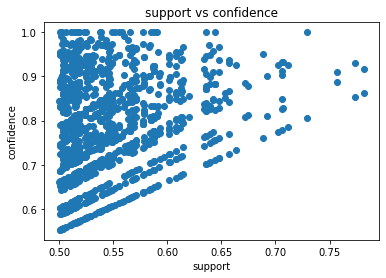

In [32]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

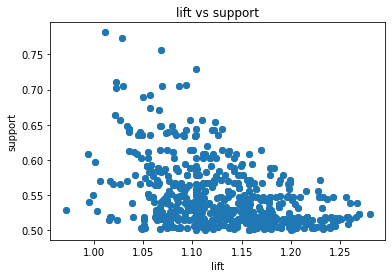

In [33]:
plt.scatter(rules['lift'],rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.title('lift vs support')
plt.show()

# Preguntas
Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [41]:
col_Age=df_Age.columns.values.tolist()
col_Cat1= df_Product_Category_1.columns.values.tolist()
col_Cat2= df_Product_Category_2.columns.values.tolist()
col_Cat3= df_Product_Category_3.columns.values.tolist()
col_G= df_Gender.columns.values.tolist()
col_names=  [col_Age, col_Cat1, col_Cat2, col_Cat3, col_G]
print(col_names)

[['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ['1_C1', '2_C1', '3_C1', '4_C1', '5_C1', '6_C1', '7_C1', '8_C1', '9_C1', '10_C1', '11_C1', '12_C1', '13_C1', '14_C1', '15_C1', '16_C1', '17_C1', '18_C1'], ['0_C2', '2_C2', '3_C2', '4_C2', '5_C2', '6_C2', '7_C2', '8_C2', '9_C2', '10_C2', '11_C2', '12_C2', '13_C2', '14_C2', '15_C2', '16_C2', '17_C2', '18_C2'], ['0_C3', '3_C3', '4_C3', '5_C3', '6_C3', '8_C3', '9_C3', '10_C3', '11_C3', '12_C3', '13_C3', '14_C3', '15_C3', '16_C3', '17_C3', '18_C3'], ['F', 'M']]


In [47]:
for i in range(0,3):
  frq_items = apriori(df, min_support = 0.3 + 0.2*i, use_colnames = True)
  print('Soporte =', 0.3 + 0.2*i)
  #bucle para categorías
  for j in col_names:
    for z in j:
      print('Columna:', z)
      frq_items_all = frq_items[frq_items['itemsets'].apply(lambda x: z in x)]
      print(frq_items_all)

Soporte = 0.3
Columna: 0-17
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: 18-25
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: 26-35
       support                   itemsets
33    0.348498                    (26-35)
107   0.326600              (26-35, 1_C1)
187   0.301307              (26-35, 5_C1)
256   0.331523              (0_C2, 26-35)
336   0.301477              (26-35, 8_C2)
399   0.347309              (0_C3, 26-35)
718   0.311662        (0_C2, 26-35, 1_C1)
858   0.325751        (0_C3, 26-35, 1_C1)
1384  0.300968        (0_C3, 26-35, 5_C1)
1830  0.331523        (0_C2, 0_C3, 26-35)
2233  0.300798        (0_C3, 26-35, 8_C2)
3599  0.311662  (0_C2, 0_C3, 26-35, 1_C1)
Columna: 36-45
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: 46-50
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: 51-55
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: 55+
Empty DataFrame
Columns: [support, itemsets]
Index: []
Columna: